In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Try to read the CSV file, handling potential errors
try:
    df = pd.read_csv('MacroTrends_Data_Download_MSFT(1).csv', sep=';')
except pd.errors.ParserError as e:
    # If a ParserError occurs, print the error message and problematic line
    print(f"Error reading CSV: {e}")
    # Read the file line by line to identify the problematic line
    with open('MacroTrends_Data_Download_MSFT.csv', 'r') as f:
        lines = f.readlines()
        print(f"Problematic line (line 15): {lines[14]}") # lines are 0-indexed, so line 15 is index 14


In [ ]:
df.head(20)

,"Date,Close"
0,"13-03-1986,0.0603"
1,"14-03-1986,0.0624"
2,"17-03-1986,0.0635"
3,"18-03-1986,0.0619"
4,"19-03-1986,0.0608"
5,"20-03-1986,0.0592"
6,"21-03-1986,0.0576"
7,"24-03-1986,0.056"
8,"25-03-1986,0.0571"
9,"26-03-1986,0.0587"


In [ ]:
# Step 1: Install xlrd (if not already installed)
!pip install xlrd

# Step 2: Upload the .xls file
from google.colab import files
uploaded = files.upload()

# Step 3: Load the .xls file into a DataFrame
import pandas as pd

# Replace 'your_file.xls' with the name of your uploaded file
df = pd.read_excel('FD.xls')

# Display the first few rows of the DataFrame to confirm it loaded correctly
print(df.head())


Saving FD.xls to FD.xls
        Date   Close
0 1986-03-13  0.0603
1 1986-03-14  0.0624
2 1986-03-17  0.0635
3 1986-03-18  0.0619
4 1986-03-19  0.0608


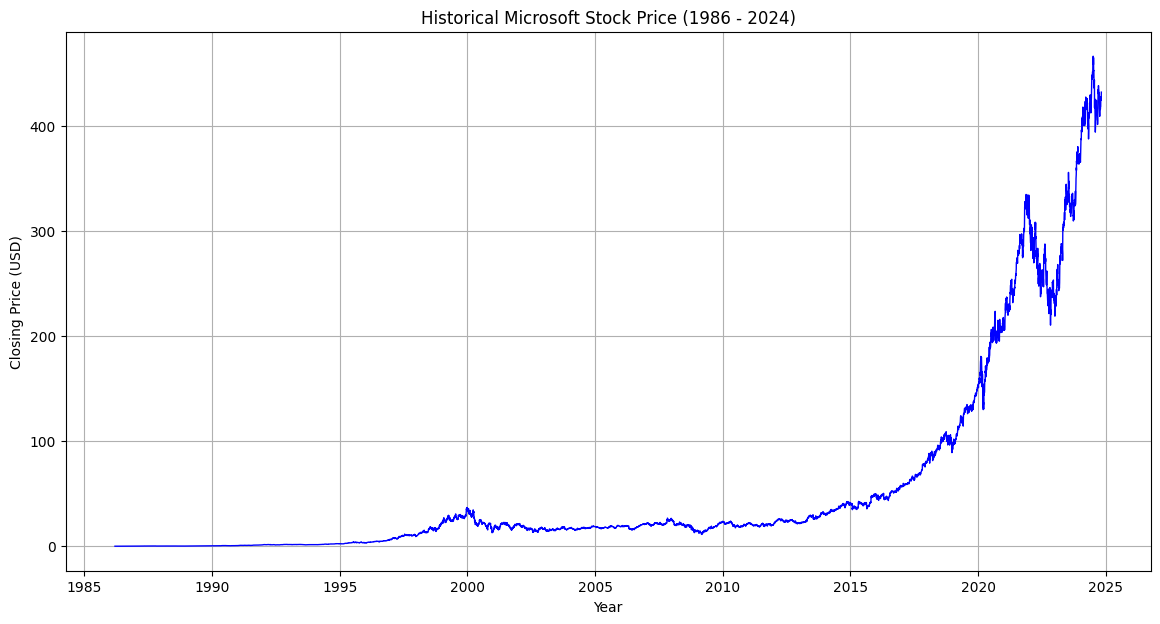

In [ ]:
# Convert 'Date' to datetime format
# The column name was likely incorrect, changed to 'Date'
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Set 'date' as the index for easier plotting
df.set_index('Date', inplace=True)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], color='blue', linewidth=1)

# Adding title and labels
plt.title('Historical Microsoft Stock Price (1986 - 2024)')
plt.xlabel('Year')
plt.ylabel('Closing Price (USD)')

# Show grid
plt.grid(True)

# Display the plot
plt.show()

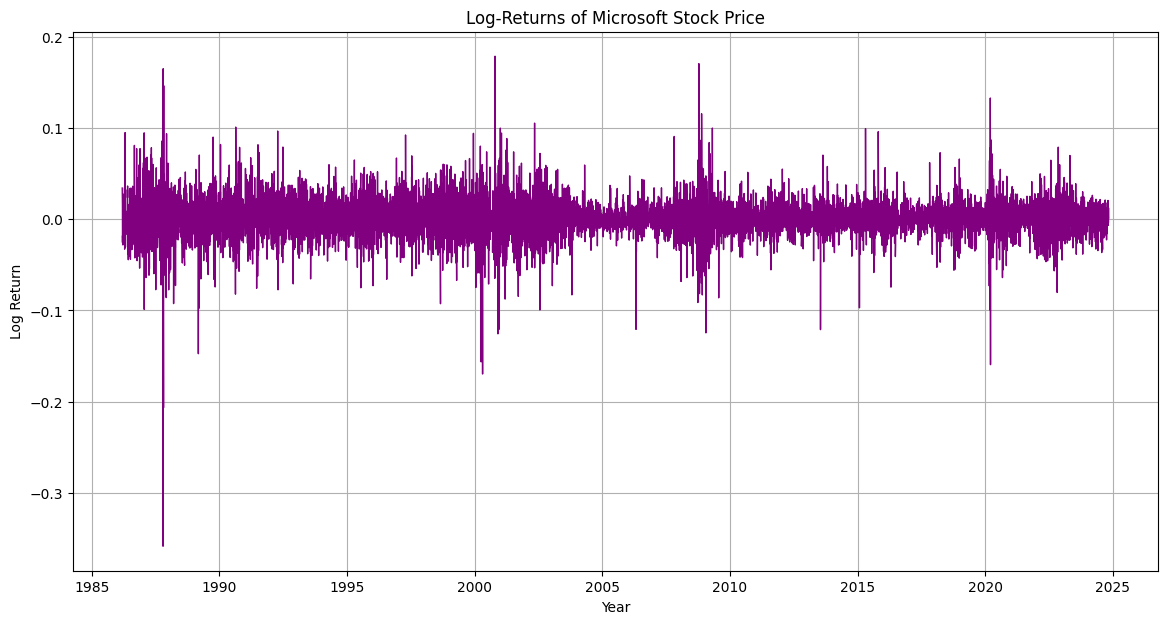

In [ ]:
# Calculate log-returns
df['Log Return'] = np.log(df['Close'] / df['Close'].shift(1))

# Drop any resulting NaN values (from the first row where there’s no prior close price)
df.dropna(inplace=True)

# Plotting log-returns
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Log Return'], color='purple', linewidth=1)

# Adding title and labels
plt.title('Log-Returns of Microsoft Stock Price')
plt.xlabel('Year')
plt.ylabel('Log Return')

# Show grid
plt.grid(True)

# Display the plot
plt.show()

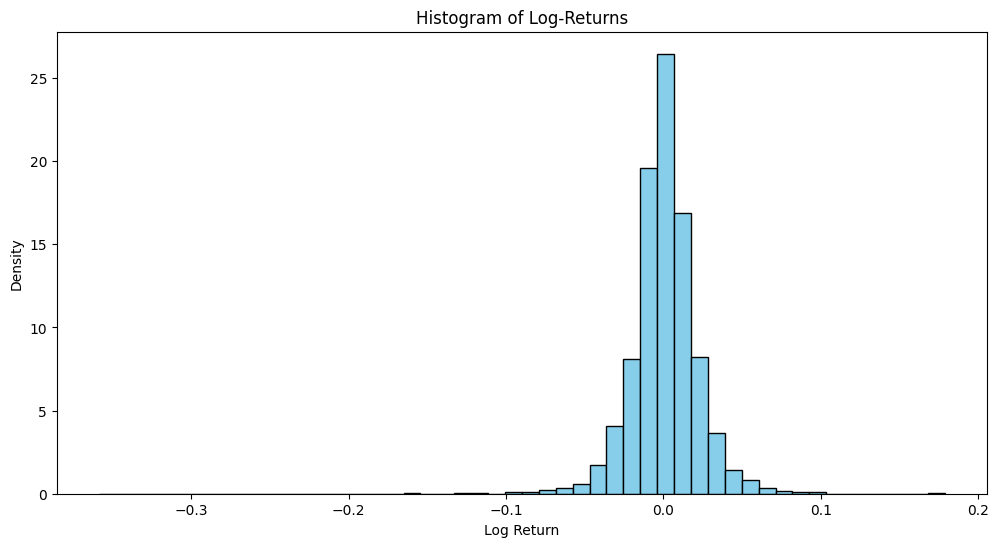

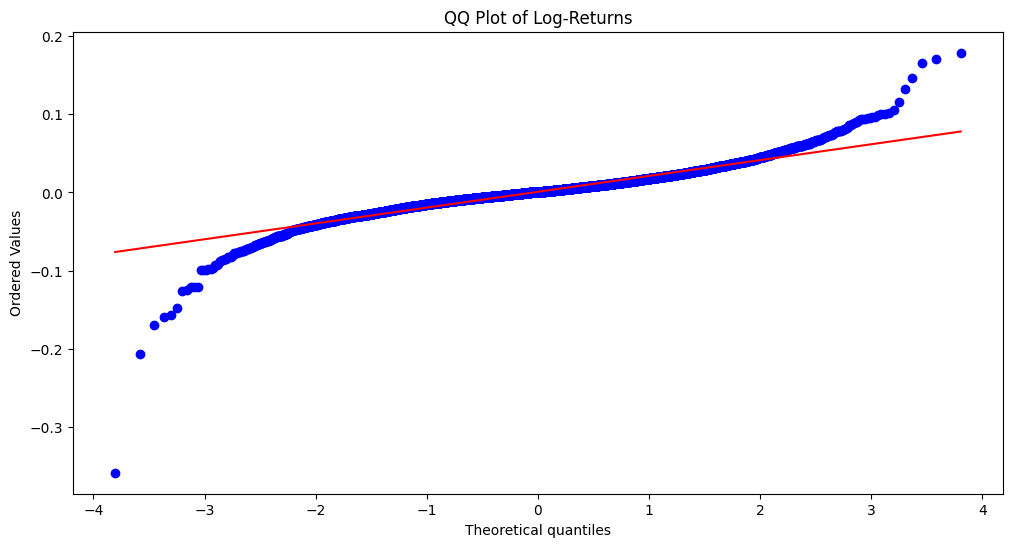

Jarque-Bera Test
Test Statistic: 91044.24265175108, p-value: 0.0
Reject the null hypothesis: The data is not normally distributed.

Kolmogorov-Smirnov Test
Test Statistic: 0.07011656980477934, p-value: 4.578579285199097e-42
Reject the null hypothesis: The data is not normally distributed.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import kstest

# Assuming df['Log Return'] has been calculated as in previous code

# 1. Plot Histogram of Log-Returns
plt.figure(figsize=(12, 6))
plt.hist(df['Log Return'], bins=50, color='skyblue', edgecolor='black', density=True)
plt.title('Histogram of Log-Returns')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.show()

# 2. QQ Plot
plt.figure(figsize=(12, 6))
stats.probplot(df['Log Return'], dist="norm", plot=plt)
plt.title('QQ Plot of Log-Returns')
plt.show()

# 3. Jarque-Bera Test
jb_test_stat, jb_p_value, jb_skew, jb_kurtosis = jarque_bera(df['Log Return']) #Modified line to unpack all returned values
print("Jarque-Bera Test")
print(f"Test Statistic: {jb_test_stat}, p-value: {jb_p_value}")
if jb_p_value < 0.05:
    print("Reject the null hypothesis: The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The data is normally distributed.")

# 4. Kolmogorov-Smirnov Test
# Perform the KS test against a normal distribution with same mean and std as the data
ks_stat, ks_p_value = kstest(df['Log Return'], 'norm', args=(df['Log Return'].mean(), df['Log Return'].std()))
print("\nKolmogorov-Smirnov Test")
print(f"Test Statistic: {ks_stat}, p-value: {ks_p_value}")
if ks_p_value < 0.05:
    print("Reject the null hypothesis: The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The data is normally distributed.")

In [ ]:
import numpy as np
import pandas as pd

# Assuming df['Log Return'] has already been calculated

# Calculate the standard deviation of daily log returns
daily_volatility = df['Log Return'].std()

# Annualize the volatility (assuming 252 trading days in a year)
annualized_volatility = daily_volatility * np.sqrt(252)

print("Daily Volatility:", daily_volatility)
print("Annualized Volatility:", annualized_volatility)


Daily Volatility: 0.021117221925671247
Annualized Volatility: 0.3352255055753197


In [ ]:
import numpy as np
import pandas as pd

# Assuming df['Log Return'] has already been calculated

# US 3-month Treasury rate as the risk-free rate
risk_free_rate = 0.041

# Calculate the standard deviation of daily log returns
daily_volatility = df['Log Return'].std()

# Annualize the volatility (assuming 252 trading days in a year)
annualized_volatility = daily_volatility * np.sqrt(252)

# Display results
print("Daily Volatility:", daily_volatility)
print("Annualized Volatility:", annualized_volatility)
print("Risk-Free Rate (3-Month Treasury Rate):", risk_free_rate)


Daily Volatility: 0.021117221925671247
Annualized Volatility: 0.3352255055753197
Risk-Free Rate (3-Month Treasury Rate): 0.041


In [ ]:
# Assume an example expected annual return (replace with your calculated value if available)
expected_annual_return = 0.12  # Example: 12% annually

# Calculate the Sharpe Ratio
sharpe_ratio = (expected_annual_return - risk_free_rate) / annualized_volatility

print("Expected Annual Return:", expected_annual_return)
print("Sharpe Ratio:", sharpe_ratio)


Expected Annual Return: 0.12
Sharpe Ratio: 0.20881466008937716


<Figure size 1200x600 with 0 Axes>

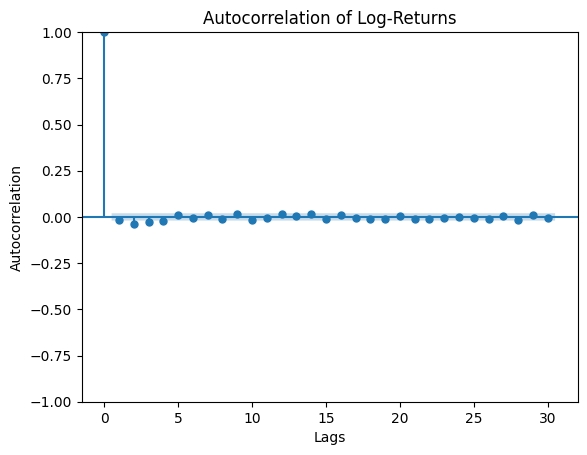

Ljung-Box Test Results:
      lb_stat  lb_pvalue
10  39.872483   0.000018
Reject the null hypothesis: The log-returns are not independent (significant autocorrelation exists).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming df['Log Return'] contains the log-returns calculated previously

# 1. Autocorrelation Plot
plt.figure(figsize=(12, 6))
plot_acf(df['Log Return'], lags=30)
plt.title('Autocorrelation of Log-Returns')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# 2. Ljung-Box Test
# Perform the test up to 10 lags (you can change the number of lags if needed)
ljung_box_test = acorr_ljungbox(df['Log Return'], lags=[10], return_df=True)
print("Ljung-Box Test Results:")
print(ljung_box_test)

# Interpret Ljung-Box test result
p_value = ljung_box_test['lb_pvalue'].values[0]
if p_value < 0.05:
    print("Reject the null hypothesis: The log-returns are not independent (significant autocorrelation exists).")
else:
    print("Fail to reject the null hypothesis: The log-returns are independent (no significant autocorrelation).")


In [ ]:
import numpy as np
from scipy.stats import norm
from datetime import datetime

# Parameters (replace these with actual data)
S0 = 415.49 # Current stock price,
X_call = 405.49  # ITM Call Strike Price (below current price)
X_put = 425.49   # ITM Put Strike Price (above current price)
risk_free_rate = 0.05  # 5% risk-free rate
volatility = 0.2  # Assume 20% annualized volatility
maturity_date = datetime(2024, 11, 25)  # Option maturity date
pricing_date = datetime.today()  # Use today's date for pricing

# Time to maturity in years
T = (maturity_date - pricing_date).days / 365.25

# Number of periods for the CRR model
N = 100  # Increase N for a more accurate approximation

# Black-Scholes Model (as previously implemented)
def black_scholes_call(S0, X, T, r, sigma):
    d1 = (np.log(S0 / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_put(S0, X, T, r, sigma):
    d1 = (np.log(S0 / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = X * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return put_price

# CRR Binomial Tree Model
def crr_binomial_tree_option(S0, X, T, r, sigma, N, option_type="call"):
    # Calculate parameters
    delta_t = T / N
    u = np.exp(sigma * np.sqrt(delta_t))         # Up factor
    d = np.exp(-sigma * np.sqrt(delta_t))        # Down factor
    p = (np.exp(r * delta_t) - d) / (u - d)      # Risk-neutral probability

    # Generate price tree
    price_tree = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            price_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Calculate option value at each final node
    option_tree = np.zeros((N+1, N+1))
    if option_type == "call":
        option_tree[:, N] = np.maximum(price_tree[:, N] - X, 0)
    else:
        option_tree[:, N] = np.maximum(X - price_tree[:, N], 0)

    # Backward induction for option price
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            option_tree[j, i] = np.exp(-r * delta_t) * (p * option_tree[j, i+1] + (1 - p) * option_tree[j+1, i+1])

    return option_tree[0, 0]

# Calculate option prices
# Black-Scholes Prices
call_price_bs = black_scholes_call(S0, X_call, T, risk_free_rate, volatility)
put_price_bs = black_scholes_put(S0, X_put, T, risk_free_rate, volatility)

# CRR Binomial Tree Prices
call_price_crr = crr_binomial_tree_option(S0, X_call, T, risk_free_rate, volatility, N, option_type="call")
put_price_crr = crr_binomial_tree_option(S0, X_put, T, risk_free_rate, volatility, N, option_type="put")

# Display the results
print(f"Black-Scholes Call Option Price (Strike={X_call}): ${call_price_bs:.2f}")
print(f"CRR Call Option Price (Strike={X_call}): ${call_price_crr:.2f}")
print(f"Black-Scholes Put Option Price (Strike={X_put}): ${put_price_bs:.2f}")
print(f"CRR Put Option Price (Strike={X_put}): ${put_price_crr:.2f}")


Black-Scholes Call Option Price (Strike=405.49): $10.46
CRR Call Option Price (Strike=405.49): $10.46
Black-Scholes Put Option Price (Strike=425.49): $10.18
CRR Put Option Price (Strike=425.49): $10.18


In [ ]:
pip install arch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 11.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004459. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             Log Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                25032.1
Distribution:                  Normal   AIC:                          -50056.3
Method:            Maximum Likelihood   BIC:                          -50027.5
                                        No. Observations:                 9736
Date:                Thu, Nov 21 2024   Df Residuals:                     9735
Time:                        13:22:41   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0541e-03  5.576e-05     18.904  1.054e-79 [9.

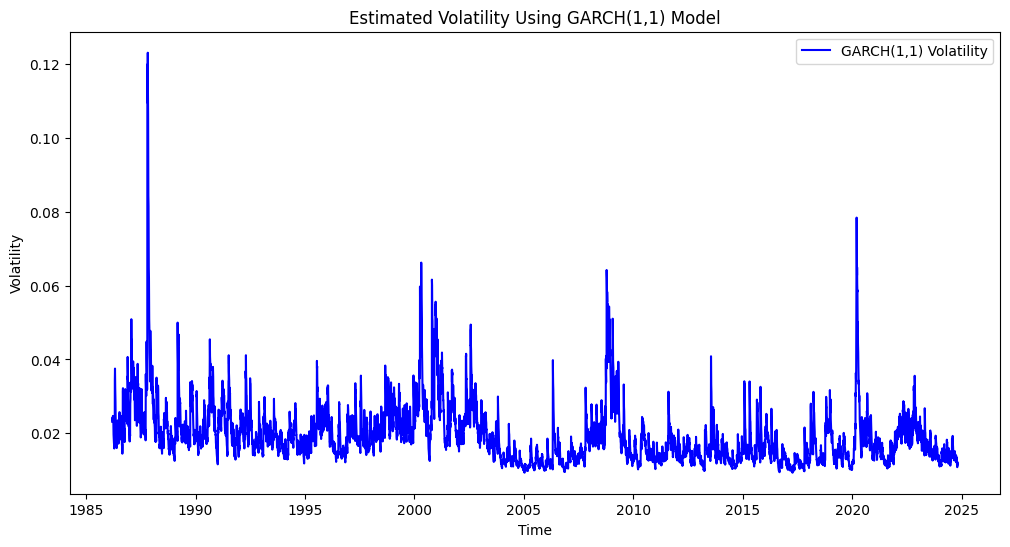

In [ ]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Assuming df['Log Return'] contains the log-returns of your data
# Replace this with your actual log-returns data
log_returns = df['Log Return']

# Step 1: Define and Fit the GARCH(1,1) Model
garch_model = arch_model(log_returns, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp="off")  # disp="off" suppresses output

# Step 2: Print Model Summary
print(garch_fit.summary())

# Step 3: Extract the Conditional Volatility (estimated sigma_t) from the Model
df['GARCH Volatility'] = garch_fit.conditional_volatility

# Step 4: Plot the Volatility
plt.figure(figsize=(12, 6))
plt.plot(df['GARCH Volatility'], color='blue', label='GARCH(1,1) Volatility')
plt.title("Estimated Volatility Using GARCH(1,1) Model")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.show()
